In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from utils import SIR_net, SIR_net_adaptive
import utils

Testing the effect of rewiring in the information network

In [8]:
N = 1000 # number of nodes
ave_degree = 15
p = ave_degree / N  # edge probability
initial_infecteds = np.random.choice(np.arange(N), size=100, replace=False)
#initial_no_vax = np.arange(100,400)
initial_no_vax = 300


mu = 0.1       # recovery rate
beta = 0.15    # infection rate
pro = 0.      # rate of classical media influence on people
pol = 0.5      # propensity of opinion polarization
p_sym = 0.     # prob for an infected person to have severe symptoms
r = 0.1        # rate of vaccination for PV

G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
G_info_static = G_phys.copy()
utils.initNET_SI(G_info_static, I0=initial_no_vax, I_seed=np.arange(10)) # initialize information network
#utils.initNET_rnd(G_info_static, initial_no_vax)
G_info_dynamic = G_info_static.copy()


sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds, rewiring=False)
sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds)

(0.0, 50.0)

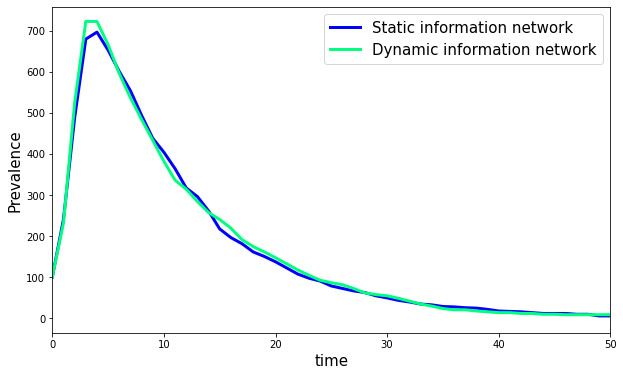

In [9]:
colors = cm.get_cmap('winter', 2)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.plot(sim_static[0], sim_static[2], lw=3, c=colors(0), label= "Static information network", alpha=1)
ax.plot(sim_dynamic[0], sim_dynamic[2], lw=3, c=colors(1), label= "Dynamic information network", alpha=1)
ax.legend(fontsize=15)
ax.set_ylabel("Prevalence", size=15)
ax.set_xlabel("time", size=15)
ax.set_xlim(0, 50)

infoNET clustering coefficients:
static: 0.0485423322184688
dynamic: 0.45878292514858804


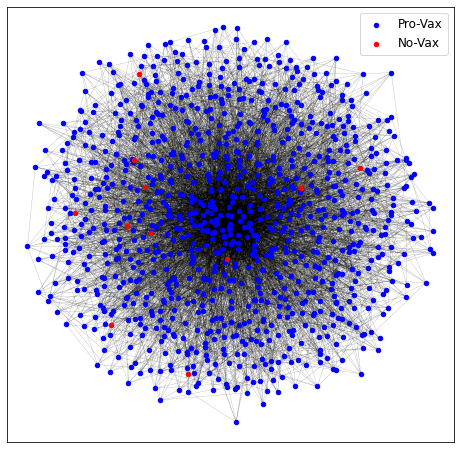

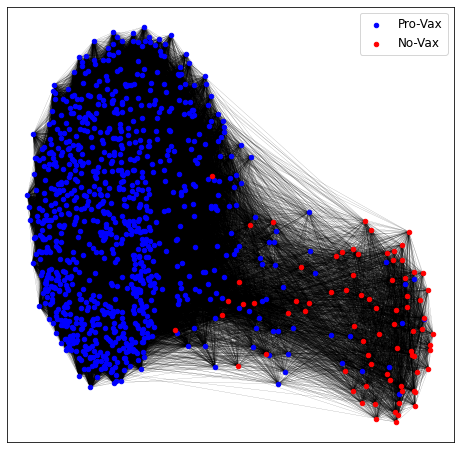

In [10]:
print('infoNET clustering coefficients:')
print('static:', nx.algorithms.cluster.average_clustering(G_info_static))
print('dynamic:', nx.algorithms.cluster.average_clustering(G_info_dynamic))
utils.plot_info_network(G_info_static)
utils.plot_info_network(G_info_dynamic)

In [23]:
vac = 0
rec = 0
for i in G_phys.nodes():
    if G_phys.nodes[i]['inf_status'] == 'V':
        vac += 1
    elif G_phys.nodes[i]['inf_status'] == 'R':
        rec += 1    
print('vaccinated', vac)
print('recovered', rec)

vaccinated 346
recovered 654


Testing if with a faster dynamics we can appreciate differences among curves with this second scheme

In [26]:
N = 1000 # number of nodes
ave_degree = 15
p = ave_degree / N  # edge probability
initial_infecteds = np.random.choice(np.arange(N), size=100, replace=False)

mu = 0.1       # recovery rate
beta = 0.15    # infection rate
pro = 0.05       # rate of classical media influence on people
pol = 0.5       # propensity of opinion polarization
p_sym = 0.05    # prob for an infected person to have severe symptoms
r = 0.1         # rate of vaccination for PV


G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
G_info_0 = G_phys.copy()
G_info_50 = G_phys.copy()
G_info_100 = G_phys.copy()
G_info_300 = G_phys.copy()
utils.initNET_SI(G_info_0, I0=0, I_seed=[])
utils.initNET_SI(G_info_50, I0=50, I_seed=np.arange(10))
utils.initNET_SI(G_info_100, I0=100, I_seed=np.arange(10))
utils.initNET_SI(G_info_300, I0=300, I_seed=np.arange(10))

sim1 = SIR_net(G_phys, beta=beta, mu=mu, initial_infecteds=initial_infecteds)
sim2 = SIR_net_adaptive(G_phys, G_info_0, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds)
sim3 = SIR_net_adaptive(G_phys, G_info_50, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds)
sim4 = SIR_net_adaptive(G_phys, G_info_100, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds)
sim5 = SIR_net_adaptive(G_phys, G_info_300, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds)

(0.0, 50.0)

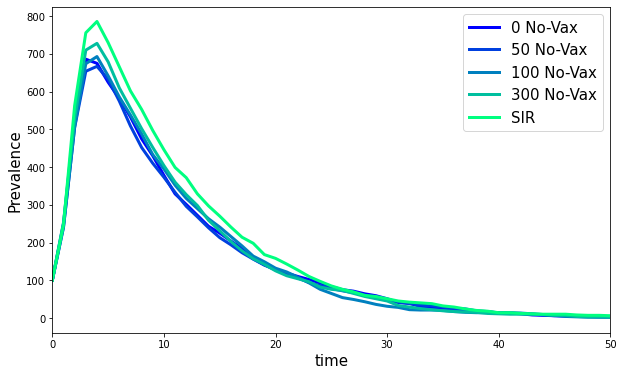

In [27]:
colors = cm.get_cmap('winter', 5)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.plot(sim2[0], sim2[2], lw=3, c=colors(0), label= "0 No-Vax", alpha=1)
ax.plot(sim3[0], sim3[2], lw=3, c=colors(1), label= "50 No-Vax", alpha=1)
ax.plot(sim4[0], sim4[2], lw=3, c=colors(2), label= "100 No-Vax", alpha=1)
ax.plot(sim5[0], sim5[2], lw=3, c=colors(3), label= "300 No-Vax", alpha=1)
ax.plot(sim1[0], sim1[2], lw=3, c=colors(4), label= "SIR", alpha=1)
ax.legend(fontsize=15)
ax.set_ylabel("Prevalence", size=15)
ax.set_xlabel("time", size=15)
ax.set_xlim(0,50)

In [28]:
print('total infected with 0 novax:', sim2[4])
print('total infected with 50 novax:', sim3[4])
print('total infected with 100 novax:', sim4[4])
print('total infected with 300 novax:', sim5[4])

total infected with 0 novax: 846
total infected with 50 novax: 865
total infected with 100 novax: 879
total infected with 300 novax: 923
